In [14]:
####### dropout resnet18 vs without dropout
#### 
import torch
import sys
sys.path.append("..")
import numpy as np

CLEAN_PATH = "/home/yifan/dataset/resnet18_with_dropout/pairflip/cifar10/0/"
REF_PATH = "/home/yifan/dataset/clean/pairflip/cifar10/0"


ENCODER_DIMS=[512,256,256,256,256,2]
DECODER_DIMS= [2,256,256,256,256,512]
VIS_MODEL_NAME = 'vis'

DEVICE='cuda:1'
########## initulize reference data and target data
from alignment.data_preprocess import DataInit
REF_EPOCH = 200
TAR_EPOCH = 200
ref_datainit = DataInit(REF_PATH,REF_PATH,REF_EPOCH)
tar_datainit = DataInit(CLEAN_PATH,CLEAN_PATH,TAR_EPOCH)
ref_model, ref_provider, ref_train_data, ref_prediction, ref_prediction_res, ref_scores = ref_datainit.getData()
tar_model, tar_provider, tar_train_data, tar_prediction, tar_prediction_res, tar_scores = tar_datainit.getData()


from alignment.ReferenceGenerator import ReferenceGenerator
gen = ReferenceGenerator(ref_provider=ref_provider, tar_provider=tar_provider,REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH,ref_model=ref_model,tar_model=tar_model,DEVICE=DEVICE)

absolute_alignment_indicates,predict_label_diff_indicates,predict_confidence_Diff_indicates,high_distance_indicates = gen.subsetClassify(18,0.8,0.3,0.05)


from representationTrans.trans_visualizer_border import visualizer
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

I = np.eye(512)
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
vis = visualizer(ref_provider, I,I, np.dot(ref_provider.train_representation(TAR_EPOCH),I), projector, 200,[0,1],'tab10')


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 7985.56it/s]


NET resnet18_with_dropout
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 4078.97it/s]


absolute alignment indicates number: 106 label diff indicates number: 12 confidence diff indicates number: 16 high distance number: 97


In [ ]:
new_Rep = gen.generate_representation_by_cka( 500, absolute_alignment_indicates)

In [ ]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from representationTrans.trans_visualizer_border import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(ref_provider, I,I, np.dot(tar_train_data,R_n.detach().numpy()), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

In [16]:
from CKA_utils.CKA import CKA, CudaCKA
np_cka = CKA()

print('CKA between absolute alignmnet subset is:',np_cka.kernel_CKA(ref_train_data[absolute_alignment_indicates],tar_train_data[absolute_alignment_indicates]))
print('CKA between absolute alignmnet subset is:',np_cka.kernel_CKA(new_Rep,tar_train_data[absolute_alignment_indicates]))
print('CKA between absolute alignmnet subset is:',np_cka.kernel_CKA(new_Rep,ref_train_data[absolute_alignment_indicates]))

CKA between absolute alignmnet subset is: 0.9399421948154587
CKA between absolute alignmnet subset is: 0.9811753363640203
CKA between absolute alignmnet subset is: 0.938457561183095


In [12]:
X = new_Rep
Y = tar_train_data[absolute_alignment_indicates]
from AlignVis.align_metrix_generator import TrainingSnapshotAlignment
alignment_n = TrainingSnapshotAlignment(ref_provider, tar_provider,ref_EPOCH=REF_EPOCH,tar_EPOCH=TAR_EPOCH, projector=projector, visualizer=vis)
R_n = alignment_n.align_embeddings(Y,X,15000,10,1e-3)

iteration 0, loss1 84442920.0 loss2 {tensor(0.5829, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.8815, requires_grad=True)}
iteration 99, loss1 12881.20703125 loss2 {tensor(0.6440, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.7722, requires_grad=True)}
iteration 198, loss1 2546.24267578125 loss2 {tensor(0.7518, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.6885, requires_grad=True)}
iteration 297, loss1 939.5365600585938 loss2 {tensor(0.6949, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.6388, requires_grad=True)}
iteration 396, loss1 492.11309814453125 loss2 {tensor(0.6076, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.5930, requires_grad=True)}
iteration 495, loss1 325.28546142578125 loss2 {tensor(0.5513, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.5705, requires_grad=True)}
iteration 594, loss1 250.6356964111328 loss2 {tensor(0.5199, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.5599, requires_grad=True)}
iteration 693, loss1 211.6870574951172 loss2 {tensor(0.4971,

In [ ]:
from AlignVis.alignment_metrix_generator import TrainingSnapshotAlignment
alignment = TrainingSnapshotAlignment(ref_provider, tar_provider,ref_EPOCH=REF_EPOCH,tar_EPOCH=TAR_EPOCH, projector=projector,visualizer=vis )
X = ref_train_data
Y = tar_train_data
S = alignment.align_embeddings_S(X,Y,R_n.detach().numpy(), 15000,10,1e-3)

Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 6886.66it/s]


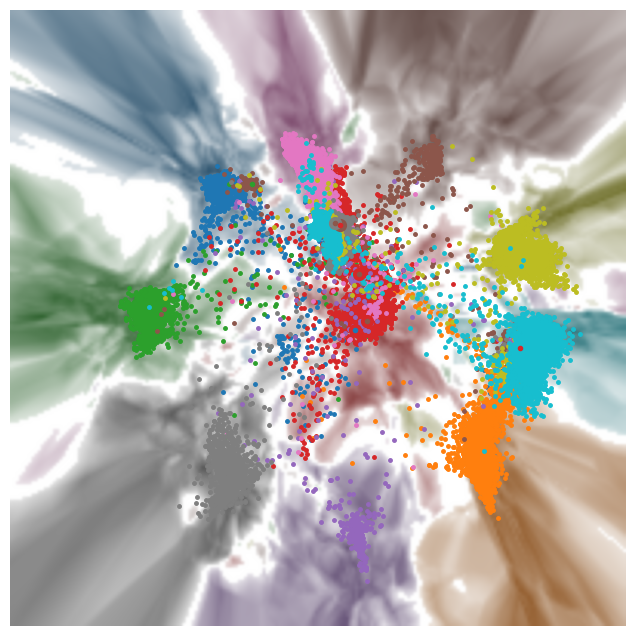

In [13]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from representationTrans.trans_visualizer_border import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(ref_provider, I,I, np.dot(tar_train_data,R_n.detach().numpy()), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))